# Loading and Preparing the Data for Analysis

### based on Exercise 2.01 from "The Data Science Workshop", published by Packt

#### import modules

In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
plt.style.use('seaborn')

#### load dataset using pandas (available here: https://github.com/PacktWorkshops/The-Data-Science-Workshop/blob/master/Chapter02/Dataset/Boston.csv)

In [33]:
raw_data = pd.read_csv('Boston.csv')

#### .head() shows first 5 rows

In [34]:
raw_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


#### check for missing values ( .dropna() ) and duplicates ( .drop_duplicates() )

In [35]:
raw_data = raw_data.dropna()

In [36]:
raw_data = raw_data.drop_duplicates()

#### show column names and rename meaningfully ( .info() for data types )

In [37]:
list(raw_data.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [38]:
renamed_data = raw_data.rename(columns = {'CRIM' : 'crime_rate_per_capita',\
                                         ' ZN ' : 'land_over_25k_sqft',\
                                         'INDUS ' : 'non_retail_proportion',\
                                         'CHAS' : 'river_dummy',\
                                         'NOX' : 'nitric_oxide_pp10m',\
                                         'RM' : 'avg_rooms',\
                                         'AGE' : 'bulit_prior1940_proportion',\
                                         'DIS' : 'distances_employment',
                                         'RAD' : 'radial_highways_access',\
                                         'TAX' : 'property_tax_rate_per10k',\
                                         'PTRATIO' : 'pupil_teacher_ratio',\
                                         'LSTAT' : 'lower_status_percentage',\
                                         'MEDV' : 'median_value_homes'})

In [39]:
renamed_data.head()

,crime_rate_per_capita,land_over_25k_sqft,non_retail_proportion,river_dummy,nitric_oxide_pp10m,avg_rooms,bulit_prior1940_proportion,distances_employment,radial_highways_access,property_tax_rate_per10k,pupil_teacher_ratio,lower_status_percentage,median_value_homes
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [40]:
renamed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   crime_rate_per_capita       506 non-null    float64
 1   land_over_25k_sqft          506 non-null    float64
 2   non_retail_proportion       506 non-null    float64
 3   river_dummy                 506 non-null    int64  
 4   nitric_oxide_pp10m          506 non-null    float64
 5   avg_rooms                   506 non-null    float64
 6   bulit_prior1940_proportion  506 non-null    float64
 7   distances_employment        506 non-null    float64
 8   radial_highways_access      506 non-null    int64  
 9   property_tax_rate_per10k    506 non-null    int64  
 10  pupil_teacher_ratio         506 non-null    float64
 11  lower_status_percentage     506 non-null    float64
 12  median_value_homes          506 non-null    float64
dtypes: float64(10), int64(3)
memory usa

#### calculate basic statistics for columns with numpy number data type, ( .T for results transpose )

In [41]:
renamed_data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crime_rate_per_capita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
land_over_25k_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non_retail_proportion,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
river_dummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitric_oxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
avg_rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
bulit_prior1940_proportion,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
distances_employment,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radial_highways_access,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
property_tax_rate_per10k,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### divide data into training and test sets

In [42]:
X = renamed_data.drop('crime_rate_per_capita', axis = 1)
y = renamed_data[['crime_rate_per_capita']]

seed = 10
test_data_size = 0.3  # data for test: 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)

train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

#### plot correlation matrix

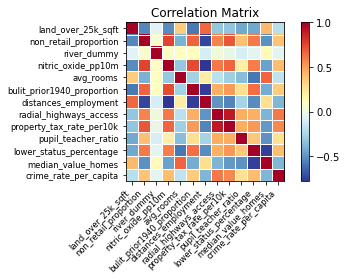

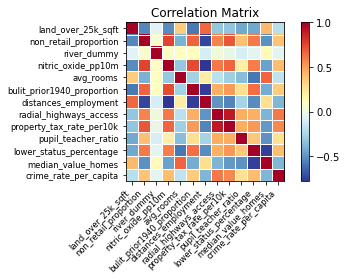

In [55]:
correl_matrix = train_data.corr(method = 'pearson')

xnames = list(train_data.columns)
ynames = list(train_data.columns)

plot_corr(correl_matrix, xnames=xnames, ynames=ynames, title=None, normcolor=False, cmap='RdYlBu_r')

In [56]:
correl_matrix

,land_over_25k_sqft,non_retail_proportion,river_dummy,nitric_oxide_pp10m,avg_rooms,bulit_prior1940_proportion,distances_employment,radial_highways_access,property_tax_rate_per10k,pupil_teacher_ratio,lower_status_percentage,median_value_homes,crime_rate_per_capita
land_over_25k_sqft,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,-0.435827,0.422574,-0.198455
non_retail_proportion,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,0.607457,-0.508338,0.387471
river_dummy,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,-0.041110,0.136831,-0.044587
nitric_oxide_pp10m,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,0.603656,-0.453424,0.405813
avg_rooms,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,-0.586573,0.666761,-0.167258
bulit_prior1940_proportion,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,0.639881,-0.419062,0.355730
distances_employment,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,-0.522120,0.289658,-0.378997
radial_highways_access,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,0.456592,-0.383132,0.608838
property_tax_rate_per10k,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,0.528029,-0.478903,0.565035
pupil_teacher_ratio,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,0.374842,-0.503692,0.276530


# Graphical Investigation of Linear Relationships

### based on Exercise 2.01 from "The Data Science Workshop", published by Packt

#### use matplotlib to visualize data, seaborn.regplot to create the scatter plot (ci - confidence interval of the regression parameters)

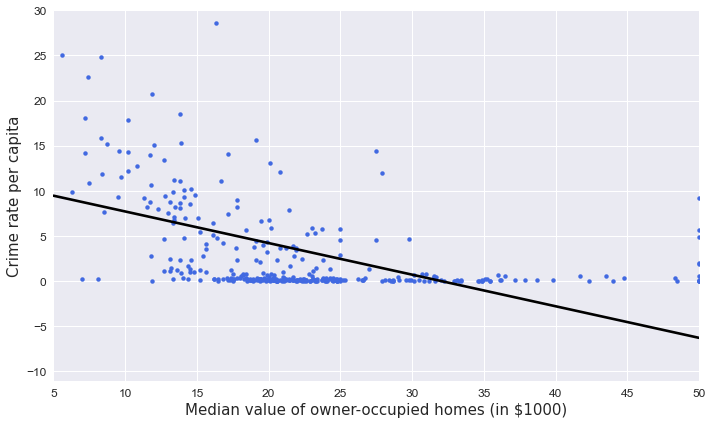

In [80]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(x='median_value_homes', y='crime_rate_per_capita', ci=None, data=train_data, ax=ax, color='k', \
           scatter_kws={"s" : 20, "color" : "royalblue", "alpha" : 1})

ax.set_ylabel('Crime rate per capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel('Median value of owner-occupied homes (in $1000)', fontsize=15, fontname='DejaVu Sans')

ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)

ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()